<a href='https://www.youtube.com/watch?v=0K4J_PTgysc&list=PLKnIA16_RmvYuZauWaPlRTC54KxSNLtNn&index=49'>project source yt link </a>

# Importing Libraries

In [27]:
import opendatasets as od
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
import matplotlib.pyplot as plt

# Downloading dataset

In [8]:
dataset_link = 'https://www.kaggle.com/datasets/salader/dogs-vs-cats'

od.download(dataset_link)

100%|██████████| 1.06G/1.06G [10:30<00:00, 1.81MB/s]


# Generators: train & validation

Note:<br> 
use --> tf.keras.preprocessing.image_dataset_from_directory(...) <br>
instead of --> tf.keras.utils.image_dataset_from_directory(...). <br> 
<a href='https://stackoverflow.com/questions/62409838/error-in-loading-image-dataset-from-directory-in-tensorflow'>see ref</a> <br> <br>

retunred images are saved as <u><b> numpy array. </b></u>

In [15]:
# generators

train_ds = keras.preprocessing.image_dataset_from_directory(
    # directory = '/content/train',
    directory = r'dogs-vs-cats\train',
    labels='inferred',
    label_mode = 'int', # labels converted as 0,1,... and so on. so first label is 0, then 1 and so on. 
    batch_size=32,
    image_size=(256,256) #  resizing images
)

validation_ds = keras.preprocessing.image_dataset_from_directory(
    # directory = '/content/test',
    directory = r'dogs-vs-cats\test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


here, the images are saved as numpy array. But, the values are too big. We need to scale them for computational ease.

# Normalizing / Scaling

in the array, all values are in range of 0~255. we need to make it 0~1. So, dividing the image array values by 255 would work. <br> <br>

in the process function: 
- for each image: we have image array and label. divide image array by 255 and return the new image array value and label.
- call the map function to apply this process function in each image in train_ds and validation_ds


In [16]:
# Normalizing

def process(image, label):
    image = tf.cast(image/255. , tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# Create CNN model

In [28]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

## model summary

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 115200)           

# compiling the model

In [30]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# execute/fit the model

In [31]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 28s 42ms/step - loss: 0.6886 - accuracy: 0.5823 - val_loss: 0.5811 - val_accuracy: 0.6922
Epoch 2/10
625/625 [==============================] - 27s 43ms/step - loss: 0.5500 - accuracy: 0.7201 - val_loss: 0.4956 - val_accuracy: 0.7696
Epoch 3/10
625/625 [==============================] - 27s 43ms/step - loss: 0.4364 - accuracy: 0.7962 - val_loss: 0.5549 - val_accuracy: 0.7504
Epoch 4/10
625/625 [==============================] - 27s 42ms/step - loss: 0.3297 - accuracy: 0.8565 - val_loss: 0.5680 - val_accuracy: 0.7876
Epoch 5/10
625/625 [==============================] - 29s 47ms/step - loss: 0.2023 - accuracy: 0.9186 - val_loss: 0.8729 - val_accuracy: 0.7740
Epoch 6/10
625/625 [==============================] - 30s 47ms/step - loss: 0.1238 - accuracy: 0.9536 - val_loss: 1.0829 - val_accuracy: 0.7844
Epoch 7/10
625/625 [==============================] - 30s 48ms/step - loss: 0.0820 - accuracy: 0.9705 - val_loss: 1.1013 - val_accuracy:

# performance visualization (accuracy & loss)

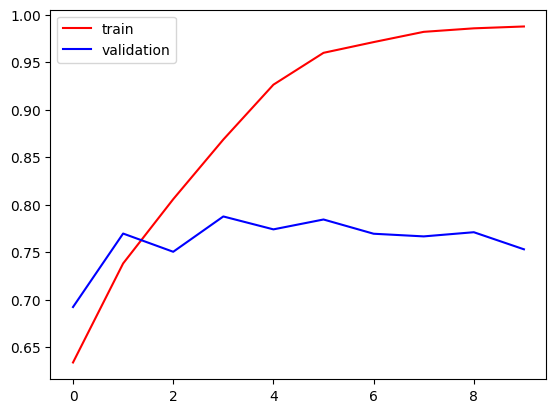

In [32]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


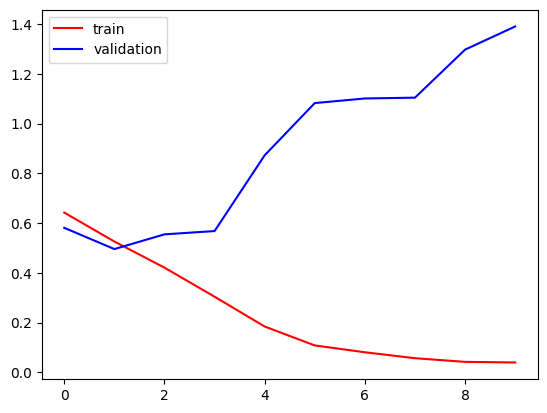

In [33]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

the gap between train-validation in accuracy graph adn validation-train in loss graph indicate overfitting. 

# ways to reduce overfitting

- Add more data
- Data Augmentation
- L1/L2 Regularizer
- Dropout
- Batch Norm
- Reduce complexity

## using dropout and batch normalization
add batch normalization between each convolution layer and add dropout between each dense layer in the model

In [34]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 254, 254, 32)      128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 125, 125, 64)      256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 128)      

In [36]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [37]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 36s 54ms/step - loss: 2.3461 - accuracy: 0.5595 - val_loss: 0.6826 - val_accuracy: 0.5480
Epoch 2/10
625/625 [==============================] - 35s 56ms/step - loss: 0.6213 - accuracy: 0.6448 - val_loss: 1.1146 - val_accuracy: 0.6358
Epoch 3/10
625/625 [==============================] - 34s 54ms/step - loss: 0.5647 - accuracy: 0.7096 - val_loss: 0.6106 - val_accuracy: 0.6818
Epoch 4/10
625/625 [==============================] - 35s 56ms/step - loss: 0.5158 - accuracy: 0.7420 - val_loss: 0.5039 - val_accuracy: 0.7582
Epoch 5/10
625/625 [==============================] - 35s 55ms/step - loss: 0.4573 - accuracy: 0.7735 - val_loss: 0.6063 - val_accuracy: 0.7012
Epoch 6/10
625/625 [==============================] - 35s 55ms/step - loss: 0.3955 - accuracy: 0.7980 - val_loss: 0.5492 - val_accuracy: 0.7700
Epoch 7/10
625/625 [==============================] - 35s 55ms/step - loss: 0.3469 - accuracy: 0.8249 - val_loss: 0.4443 - val_accuracy:

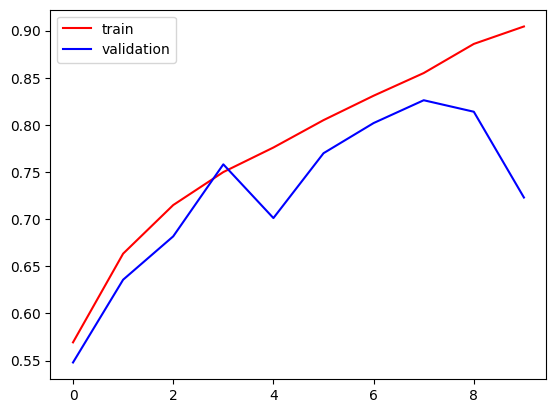

In [38]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

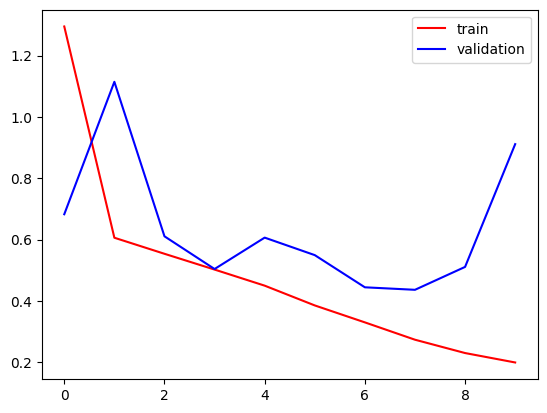

In [39]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

here, using batch normalization and dropout: we managed to reduce the gap to some extent. so improvement!

# predicting single given image

In [40]:
import cv2

## loading image

In [41]:

test_img = cv2.imread('cat.jpg')

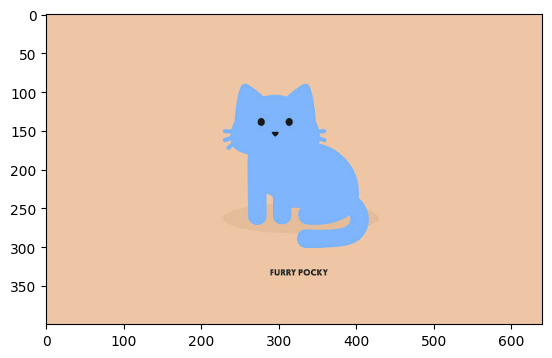

In [44]:
plt.imshow(test_img);

## shape resizing

the shape of the image shows that its a 400x640x3. 3 means RGB --> 3 channels. <br> <br>

Now, our model accept images in 256x256. use cv2 for that. then, reshape the image in batch: (1,256,256,3) means: this batch contains only 1 image with size of 256x256x3.



In [45]:
test_img.shape

(400, 640, 3)

In [47]:
test_img = cv2.resize(test_img, (256,256))

In [48]:
test_input = test_img.reshape((1,256,256,3))

## predict

In [49]:
model.predict(test_input)

array([[0.]], dtype=float32)

0 means cat

In [52]:
import numpy as np

In [53]:
np.argmax(model.predict(test_input) > 0.5).astype("int32")

0